In [81]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
import numpy as np

import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [4]:
df = pd.read_csv('/content/CarPrice_Assignment.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [4]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [34]:
df['mark'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [32]:
df['fueltype'] = df['fueltype'].replace({'gas': 0, 'diesel': 1})

<ipython-input-32-5cb5ffe63929>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['fueltype'] = df['fueltype'].replace({'gas': 0, 'diesel': 1})


In [21]:
df['aspiration'] = df['aspiration'].replace({'std': 0, 'turbo': 1})
df['doornumber'] = df['doornumber'].replace({'two': 2, 'four': 4})
df['drivewheel'] = df['drivewheel'].replace({'rwd': 0, 'fwd': 1, '4wd': 2})
df['enginelocation'] = df['enginelocation'].replace({'front': 0, 'rear': 1})

<ipython-input-21-2b995e85d414>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['aspiration'] = df['aspiration'].replace({'std': 0, 'turbo': 1})
<ipython-input-21-2b995e85d414>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['doornumber'] = df['doornumber'].replace({'two': 2, 'four': 4})
<ipython-input-21-2b995e85d414>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the fut

In [22]:
df['doornumber'] = df['doornumber'].replace({'convertible': 0, 'hatchback': 1,
                                             'sedan': 2, 'wagon': 3, 'hardtop': 4})
df['enginetype'] = df['enginetype'].replace({'dohc': 0, 'ohcv': 1, 'ohc': 2,
                                             'l': 3, 'rotor': 4, 'ohcf': 5, 'dohcv': 6})
df['cylindernumber'] = df['cylindernumber'].replace({'four': 4, 'six': 6, 'five': 5,
                                             'three': 3, 'twelve': 12, 'two': 2, 'eight': 8})
df['fuelsystem'] = df['fuelsystem'].replace({'mpfi': 0, '2bbl': 1, 'mfi': 2,
                                             '1bbl': 3, 'spfi': 4, '4bbl': 5, 'idi': 6, 'spdi': 7})

<ipython-input-22-574452f3bc4a>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['enginetype'] = df['enginetype'].replace({'dohc': 0, 'ohcv': 1, 'ohc': 2,
<ipython-input-22-574452f3bc4a>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['cylindernumber'] = df['cylindernumber'].replace({'four': 4, 'six': 6, 'five': 5,
<ipython-input-22-574452f3bc4a>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=Fa

In [25]:
df['carbody'] = df['carbody'].replace({'convertible': 0, 'hatchback': 1,
                                       'sedan': 2, 'wagon': 3, 'hardtop': 4})

<ipython-input-25-db56e93b09bb>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['carbody'] = df['carbody'].replace({'convertible': 0, 'hatchback': 1,


In [39]:
df['mark'] = df['mark'].replace({
    'alfa-romero': 0, 'audi': 1, 'bmw': 2, 'chevrolet': 3, 'dodge': 4, 'honda': 5,
    'isuzu': 6, 'jaguar': 7, 'maxda': 8, 'mazda': 8, 'buick': 10, 'mercury': 11,
    'mitsubishi': 12, 'Nissan': 13, 'nissan': 13, 'peugeot': 14, 'plymouth': 15, 'porsche': 16,
    'porcshce': 16, 'renault': 17, 'saab': 18, 'subaru': 19, 'toyota': 20, 'toyouta': 20,
    'vokswagen': 21, 'volkswagen': 21, 'vw': 22, 'volvo': 23
})

<ipython-input-39-d7b0bbf6cd71>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['mark'] = df['mark'].replace({


In [27]:
df[['mark', 'type']] = df['CarName'].str.split(' ', n=1, expand=True)

In [ ]:
df = df.drop(columns=['CarName', 'type', 'car_ID'])

In [46]:
df = df.drop(columns=['car_ID'])

In [47]:
df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,mark
0,3,0,0,2,0,0,0,88.6,168.8,64.1,...,0,3.47,2.68,9.0,111,5000,21,27,13495.0,0
1,3,0,0,2,0,0,0,88.6,168.8,64.1,...,0,3.47,2.68,9.0,111,5000,21,27,16500.0,0
2,1,0,0,2,1,0,0,94.5,171.2,65.5,...,0,2.68,3.47,9.0,154,5000,19,26,16500.0,0
3,2,0,0,4,2,1,0,99.8,176.6,66.2,...,0,3.19,3.40,10.0,102,5500,24,30,13950.0,1
4,2,0,0,4,2,2,0,99.4,176.6,66.4,...,0,3.19,3.40,8.0,115,5500,18,22,17450.0,1


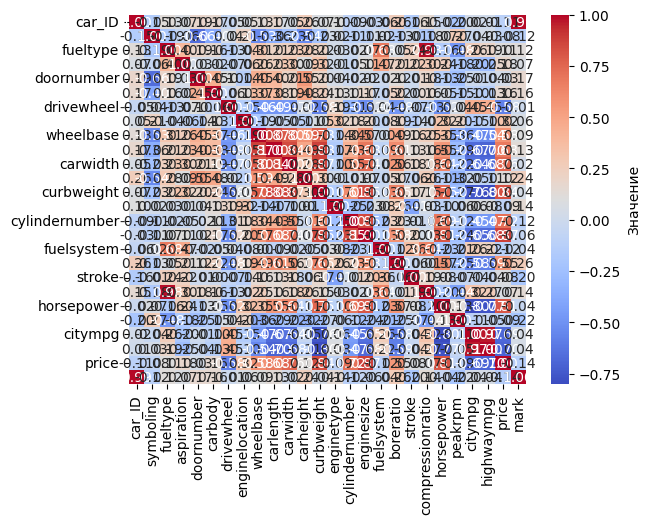

In [41]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', cbar_kws={'label': 'Значение'})
plt.show()

**Обучение**

In [49]:
y = df['price'].values
X = df.drop(columns=['price']).values

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [51]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [56]:
# Создаем модель
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(24,)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)
])

# Компилируем модель
model.compile(optimizer='adam',
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=[tf.keras.metrics.MeanAbsoluteError()])

# Обучаем модель
model.fit(X_train_scaled, y_train, epochs=100, batch_size = 32)

# Оценим точность модели
test_loss, test_mse = model.evaluate(X_test_scaled, y_test, verbose=2)
print('\nТестовая точность:', test_mse)

Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 227954624.0000 - mean_absolute_error: 13206.1230
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 234293728.0000 - mean_absolute_error: 13276.9873 
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 243428960.0000 - mean_absolute_error: 13532.2578 
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 214875536.0000 - mean_absolute_error: 12949.2998  
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 223105696.0000 - mean_absolute_error: 13003.6895 
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 233322416.0000 - mean_absolute_error: 13356.4053 
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 216634144.0000 - mean_absolute_error: 12684.4854 
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 224377888.0000 - mean_absolute_error: 13188.0986  
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 241112432.0000 - mean_absolute_error: 13494.0693 
Epoch 10/100
6/6 ━━━━━━━━━━━━━━━━━━━

In [54]:
predictions = model.predict(X_test_scaled)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


In [55]:
predictions

array([[28429.947 ],
       [16636.559 ],
       [ 7475.4424],
       [14248.615 ],
       [23084.57  ],
       [ 6301.9824],
       [ 9999.441 ],
       [ 6319.587 ],
       [ 9009.989 ],
       [ 8151.66  ],
       [11297.959 ],
       [ 4831.584 ],
       [16156.604 ],
       [ 9707.396 ],
       [44437.97  ],
       [ 7017.093 ],
       [ 9543.621 ],
       [13595.187 ],
       [ 6849.6475],
       [ 8484.693 ],
       [ 9114.2295],
       [18089.65  ],
       [ 5989.004 ],
       [ 7417.001 ],
       [ 7748.0923],
       [28914.324 ],
       [ 9377.406 ],
       [15282.392 ],
       [ 7337.3765],
       [14814.167 ],
       [22195.281 ],
       [ 7953.0557],
       [ 8951.745 ],
       [20400.852 ],
       [ 7003.717 ],
       [18415.277 ],
       [ 9469.153 ],
       [13919.232 ],
       [ 7469.8867],
       [13724.737 ],
       [ 7968.7197]], dtype=float32)

**Pytorch**

In [69]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)

X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

In [70]:
class MobileDataset(torch.utils.data.Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y  # y может быть None

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        if self.y is not None:
            return self.X[idx], self.y[idx]
        return self.X[idx]

# Создаём Dataset
train_dataset = MobileDataset(X_train_tensor, y_train_tensor)
test_dataset = MobileDataset(X_test_tensor, y_test_tensor)

In [71]:
batch_size = 64
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

In [72]:
# Определение модели
class NeuralNet(nn.Module):
    def __init__(self, input_size=X_train_tensor.shape[1],
                 hidden_size=64, num_classes=1):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)

        return out

In [73]:
model = NeuralNet()

In [62]:
# Параметры обучения
num_epochs = 100
learning_rate = 0.01

In [74]:
# Определение функции потерь и оптимизатора
criterion = nn.HuberLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [75]:
# Обучение модели
total_step = len(train_loader)
train_losses = []

for epoch in range(num_epochs):
  epoch_loss = 0
  for batch_idx, (X_batch, y_batch) in enumerate(train_loader):
    # Прямой проход

    outputs = model(X_batch)
    loss = criterion(outputs, y_batch)

    # Обратное распространение
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


    epoch_loss += loss.item()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

  train_losses.append(epoch_loss / total_step)

Epoch [1/100], Loss: 12174.9980
Epoch [1/100], Loss: 13806.0010
Epoch [1/100], Loss: 13284.8037
Epoch [2/100], Loss: 12428.9268
Epoch [2/100], Loss: 12114.4619
Epoch [2/100], Loss: 11355.8877
Epoch [3/100], Loss: 10915.7588
Epoch [3/100], Loss: 10584.6133
Epoch [3/100], Loss: 11550.2578
Epoch [4/100], Loss: 10512.9287
Epoch [4/100], Loss: 9187.6104
Epoch [4/100], Loss: 8372.7002
Epoch [5/100], Loss: 7587.2090
Epoch [5/100], Loss: 8041.2070
Epoch [5/100], Loss: 7937.1650
Epoch [6/100], Loss: 8118.5801
Epoch [6/100], Loss: 5093.2568
Epoch [6/100], Loss: 4915.6455
Epoch [7/100], Loss: 5681.1270
Epoch [7/100], Loss: 5972.1387
Epoch [7/100], Loss: 4597.6460
Epoch [8/100], Loss: 4973.5298
Epoch [8/100], Loss: 5779.4888
Epoch [8/100], Loss: 6134.3999
Epoch [9/100], Loss: 5804.0669
Epoch [9/100], Loss: 6270.7373
Epoch [9/100], Loss: 5002.1523
Epoch [10/100], Loss: 5537.9541
Epoch [10/100], Loss: 6350.5078
Epoch [10/100], Loss: 6076.2251
Epoch [11/100], Loss: 5730.5625
Epoch [11/100], Loss: 592

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/loss.py:1102: UserWarning: Using a target size (torch.Size([36])) that is different to the input size (torch.Size([36, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.huber_loss(input, target, reduction=self.reduction, delta=self.delta)


Epoch [25/100], Loss: 5239.2510
Epoch [25/100], Loss: 4139.7544
Epoch [26/100], Loss: 6708.5308
Epoch [26/100], Loss: 4695.8486
Epoch [26/100], Loss: 4689.9521
Epoch [27/100], Loss: 5527.2271
Epoch [27/100], Loss: 5451.8926
Epoch [27/100], Loss: 5359.0522
Epoch [28/100], Loss: 6217.3457
Epoch [28/100], Loss: 5112.5991
Epoch [28/100], Loss: 4791.2642
Epoch [29/100], Loss: 5387.0654
Epoch [29/100], Loss: 6387.4199
Epoch [29/100], Loss: 3974.7156
Epoch [30/100], Loss: 7159.3237
Epoch [30/100], Loss: 4671.1997
Epoch [30/100], Loss: 3852.7947
Epoch [31/100], Loss: 5078.9756
Epoch [31/100], Loss: 5831.0879
Epoch [31/100], Loss: 5519.2446
Epoch [32/100], Loss: 5005.5112
Epoch [32/100], Loss: 6293.5898
Epoch [32/100], Loss: 4827.7505
Epoch [33/100], Loss: 6114.0771
Epoch [33/100], Loss: 4778.8418
Epoch [33/100], Loss: 5600.4272
Epoch [34/100], Loss: 6207.8496
Epoch [34/100], Loss: 4541.5049
Epoch [34/100], Loss: 5863.8716
Epoch [35/100], Loss: 4949.8696
Epoch [35/100], Loss: 5144.4292
Epoch [3

In [82]:
correct = 0
total = 0

model.eval()
predictions = []
true_values = []

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        y_pred = model(X_batch)

        # Сохраняем предсказания и истинные значения
        predictions.extend(y_pred.numpy())  # Предсказания модели
        true_values.extend(y_batch.numpy())  # Истинные значения

mse = mean_absolute_error(true_values, predictions)
print(f"Среднеквадратичная ошибка (MSE): {mse:.4f}")


Среднеквадратичная ошибка (MSE): 5220.9039


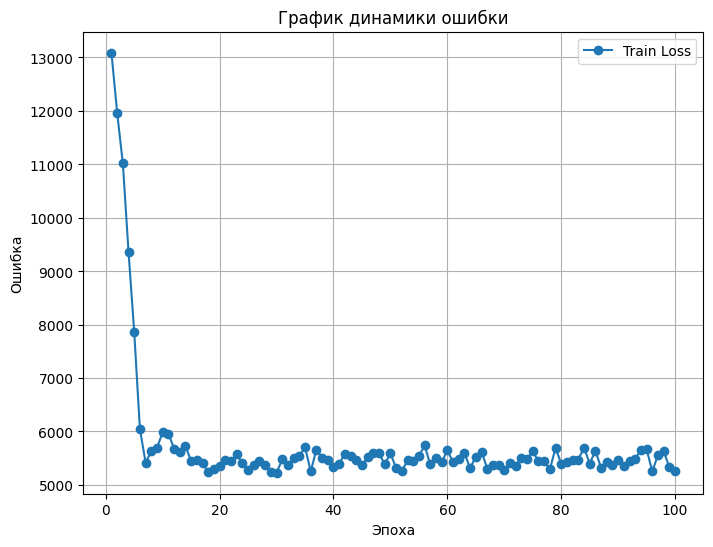

In [83]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, num_epochs + 1), train_losses, marker='o', label='Train Loss')
plt.xlabel('Эпоха')
plt.ylabel('Ошибка')
plt.title('График динамики ошибки')
plt.legend()
plt.grid(True)
plt.show()